In [1]:
# Célula 1 — imports e caminhos
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

plt.style.use("seaborn-v0_8-whitegrid")
%matplotlib inline

DATA_PATH = "/content/dataset_processado.csv"
MODEL_FIG_DIR = "/content/modelagem_figuras"
os.makedirs(MODEL_FIG_DIR, exist_ok=True)


In [2]:
# Célula 2 — carregar dataset processado
df = pd.read_csv(DATA_PATH, parse_dates=["timestamp"])
print(df.shape)
df.head()


(3, 18)


,trip_id,route_id,timestamp,lat,lon,speed,delay,region,hour,day_of_week,is_peak,delay_clip,rain_mm,temperature,wind_speed,vehicle_volume,avg_speed,jam_factor
0,489213,8091-10,2025-05-01 07:03:00,-23.5102,-46.6121,12.3,3.4,Centro,7,3,1,3.4,2.6,19.4,3.2,1580,14.2,8.1
1,489214,8091-10,2025-05-01 07:04:00,-23.5104,-46.6119,10.1,5.1,Centro,7,3,1,5.1,2.6,19.4,3.2,1580,14.2,8.1
2,389111,7156-10,2025-06-21 18:12:00,-23.5331,-46.6442,8.2,7.0,Oeste,18,5,1,7.0,NaN,NaN,NaN,2100,11.3,9.4


In [3]:
# CÉLULA 1 — Imports e caminhos
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

plt.style.use("seaborn-v0_8-whitegrid")
%matplotlib inline

DATA_PATH = "/content/dataset_processado.csv"
MODEL_FIG_DIR = "/content/modelagem_figuras"
os.makedirs(MODEL_FIG_DIR, exist_ok=True)


In [4]:
# CÉLULA 2 — Carregar dados
df = pd.read_csv(DATA_PATH, parse_dates=['timestamp'])

print(df.shape)
df.head()


(3, 18)


,trip_id,route_id,timestamp,lat,lon,speed,delay,region,hour,day_of_week,is_peak,delay_clip,rain_mm,temperature,wind_speed,vehicle_volume,avg_speed,jam_factor
0,489213,8091-10,2025-05-01 07:03:00,-23.5102,-46.6121,12.3,3.4,Centro,7,3,1,3.4,2.6,19.4,3.2,1580,14.2,8.1
1,489214,8091-10,2025-05-01 07:04:00,-23.5104,-46.6119,10.1,5.1,Centro,7,3,1,5.1,2.6,19.4,3.2,1580,14.2,8.1
2,389111,7156-10,2025-06-21 18:12:00,-23.5331,-46.6442,8.2,7.0,Oeste,18,5,1,7.0,NaN,NaN,NaN,2100,11.3,9.4


In [5]:
df.columns


Index(['trip_id', 'route_id', 'timestamp', 'lat', 'lon', 'speed', 'delay',
       'region', 'hour', 'day_of_week', 'is_peak', 'delay_clip', 'rain_mm',
       'temperature', 'wind_speed', 'vehicle_volume', 'avg_speed',
       'jam_factor'],
      dtype='object')

In [6]:
# CÉLULA 3 — Definir X e y

target = "speed"

# Escolher colunas para o modelo
features = [
    "hour",
    "region",
    "rain_mm",
    "temperature",
    "wind_speed",
    "vehicle_volume"
]

# Filtrar apenas as colunas necessárias
df_model = df[features + [target]].dropna()

X = df_model[features]
y = df_model[target]

print("Shape X:", X.shape)
print("Shape y:", y.shape)


Shape X: (2, 6)
Shape y: (2,)


In [7]:
# CÉLULA 4 — Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

X_train.shape, X_test.shape


((1, 6), (1, 6))

In [8]:
# CÉLULA 5 — Pré-processamento
categorical = ["region"]
numeric = [c for c in X.columns if c not in categorical]

preprocess = ColumnTransformer(
    transformers=[
        ("categorical", OneHotEncoder(handle_unknown="ignore"), categorical),
        ("numeric", "passthrough", numeric)
    ]
)


In [9]:
# CÉLULA 6 — Regressão Linear
model_lr = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LinearRegression())
])

model_lr.fit(X_train, y_train)

pred_lr = model_lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, pred_lr))
r2_lr = r2_score(y_test, pred_lr)

print("Regressão Linear")
print("MAE:", mae_lr)
print("RMSE:", rmse_lr)
print("R2:", r2_lr)


Regressão Linear
MAE: 2.200000000000001
RMSE: 2.200000000000001
R2: nan


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [10]:
# CÉLULA 7 — Random Forest
model_rf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestRegressor(
        n_estimators=200,
        max_depth=10,
        random_state=42
    ))
])

model_rf.fit(X_train, y_train)

pred_rf = model_rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))
r2_rf = r2_score(y_test, pred_rf)

print("Random Forest")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R2:", r2_rf)


Random Forest
MAE: 2.2000000000000046
RMSE: 2.2000000000000046
R2: nan


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [11]:
# CÉLULA 8 — Comparação
results = pd.DataFrame({
    "Modelo": ["Regressão Linear", "Random Forest"],
    "MAE": [mae_lr, mae_rf],
    "RMSE": [rmse_lr, rmse_rf],
    "R2": [r2_lr, r2_rf]
})

results


,Modelo,MAE,RMSE,R2
0,Regressão Linear,2.2,2.2,NaN
1,Random Forest,2.2,2.2,NaN


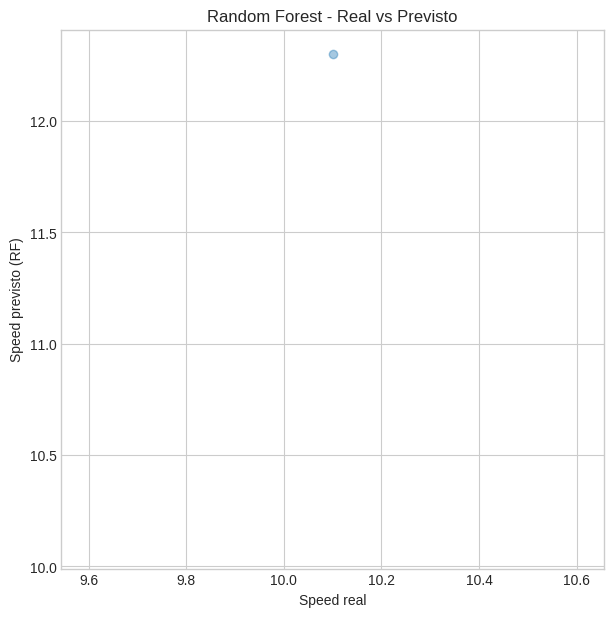

In [12]:
# CÉLULA 9 — Dispersão: valores reais x previstos
plt.figure(figsize=(7,7))
plt.scatter(y_test, pred_rf, alpha=0.4)
plt.xlabel("Speed real")
plt.ylabel("Speed previsto (RF)")
plt.title("Random Forest - Real vs Previsto")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.savefig(os.path.join(MODEL_FIG_DIR, "rf_real_vs_pred.png"), dpi=150)
plt.show()


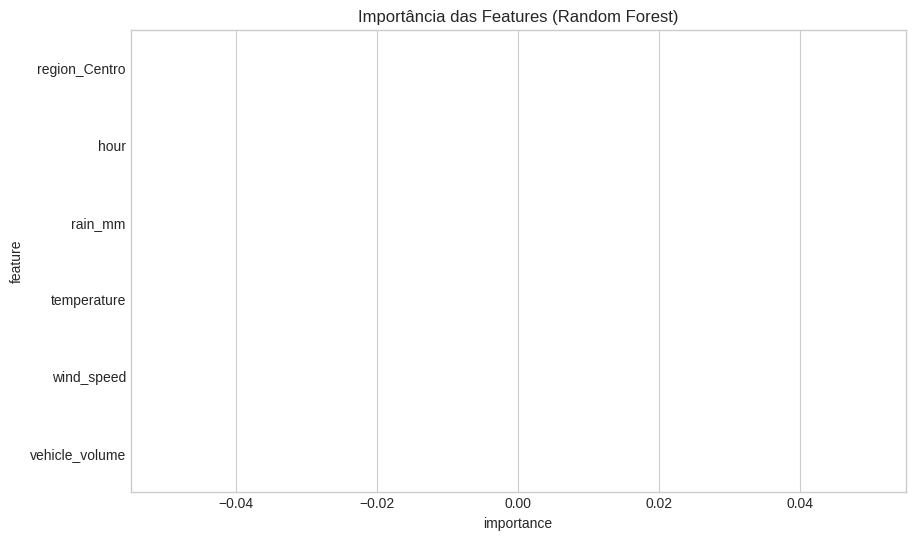

,feature,importance
0,region_Centro,0.0
1,hour,0.0
2,rain_mm,0.0
3,temperature,0.0
4,wind_speed,0.0
5,vehicle_volume,0.0


In [13]:
# CÉLULA 10 — Importância das features
rf_model = model_rf.named_steps["model"]

# Pegar nomes das features após one-hot
ohe = model_rf.named_steps["preprocess"].named_transformers_["categorical"]
ohe_features = ohe.get_feature_names_out(["region"])

all_features = list(ohe_features) + numeric

importances = pd.DataFrame({
    "feature": all_features,
    "importance": rf_model.feature_importances_
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=importances, x="importance", y="feature")
plt.title("Importância das Features (Random Forest)")
plt.savefig(os.path.join(MODEL_FIG_DIR, "rf_feature_importance.png"), dpi=150)
plt.show()

importances
